# Culmination of the works I have done over the past weeks

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from matplotlib.transforms import Bbox

In [146]:
df = pd.read_csv('1950-2023_all_tornadoes.csv')

In [147]:
df.head()

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,len,wid,ns,sn,sg,f1,f2,f3,f4,fc
0,192,1950,10,1,1950-10-01,21:00:00,3,OK,40,23,...,15.8,10,1,1,1,25,0,0,0,0
1,193,1950,10,9,1950-10-09,02:15:00,3,NC,37,9,...,2.0,880,1,1,1,47,0,0,0,0
2,195,1950,11,20,1950-11-20,02:20:00,3,KY,21,1,...,0.1,10,1,1,1,177,0,0,0,0
3,196,1950,11,20,1950-11-20,04:00:00,3,KY,21,2,...,0.1,10,1,1,1,209,0,0,0,0
4,197,1950,11,20,1950-11-20,07:30:00,3,MS,28,14,...,2.0,37,1,1,1,101,0,0,0,0


## Function to rename column names of the dataset.

In [148]:
# Call the function by passing the dataframe. It will return a dataframe with renamed column headings.
# To change the name of any columns, just make the change in the dictionary "new_columns"..
def rename_columns(dataframe):
    new_columns = {'om': 'Tornado_number',
         'yr': 'Year',
         'mo': 'Month',
         'dy': 'Day',
         'date': 'Date',
         'time': 'Time',
         'tz': 'Time_zone',
         'st': 'State',
         'stf': 'State_FIPS',
         'stn': 'Stn_no',
         'mag': 'Wind_speed',
         'inj': 'Injuries',
         'fat': 'Fatalities',
         'loss': 'Property_loss',
         'closs': 'Crop_loss',
         'slat': 'Start_lat',
         'slon': 'Start_lon',
         'elat': 'End_lat',
         'elon': 'End_lon',
         'len': 'Length',
         'wid': 'Width',
         'ns': 'States_affected',
         'sn': 'State_number',
         'sg': 'Segment_no',
         'f1': 'County1_FIPS',
         'f2': 'County2_FIPS',
         'f3': 'County3_FIPS',
         'f4': 'County4_FIPS',
         'fc': 'Estimated_Fscale'}

    return dataframe.rename(columns = new_columns)
    

In [149]:
df = rename_columns(df)

## Function to update the column property loss

As per the data description, the property loss for the years below 1996 are categorical. 
<br> 
Below see the snapshot of the data description
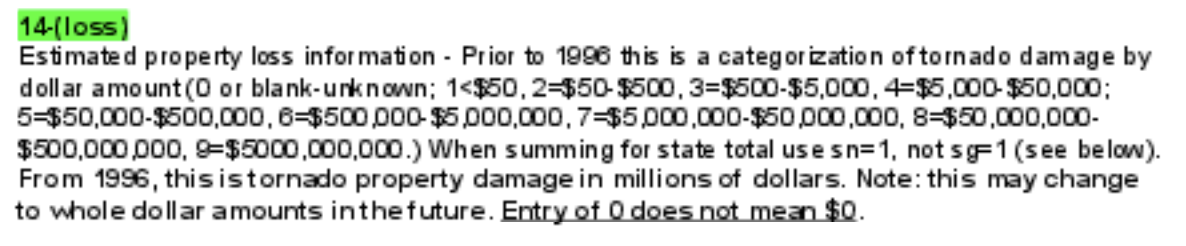
<br>
Based on the description, I have created a function to change the values.

In [150]:
# Here we need to call this function, using apply and lambda, functions for the rows whose year is below 1996.
# Below find the code to use this function.
# df['new_property_loss'] = df['property_loss'].apply(lambda x: update_property_loss(x))

def update_property_loss(value):
    if value == 1:
        return 50
    elif value == 2:
        return 275
    elif value == 3:
        return 2750
    elif value == 4:
        return 27500
    elif value == 5:
        return 275000
    elif value == 6:
        return 2750000
    elif value == 7:
        return 27500000
    elif value == 8:
        return 275000000
    elif value == 9:
        return 500000000


In [151]:
df['new_property_loss'] = df['Property_loss'].apply(lambda x: update_property_loss(x))

## Number of tornadoes affected over the years.

### Trend for each State

In [152]:
state_trend = df[['Year', 'Tornado_number', 'State']].groupby(['Year', 'State']).nunique('Tornado_number').reset_index()

# Lets find top 6 states with highest occurence of tornadoes
state_group = df[['Tornado_number', 'State']].groupby('State').nunique('Tornado_number').sort_values('Tornado_number', ascending = False).reset_index()
top6_states = state_group['State'].head(6).values

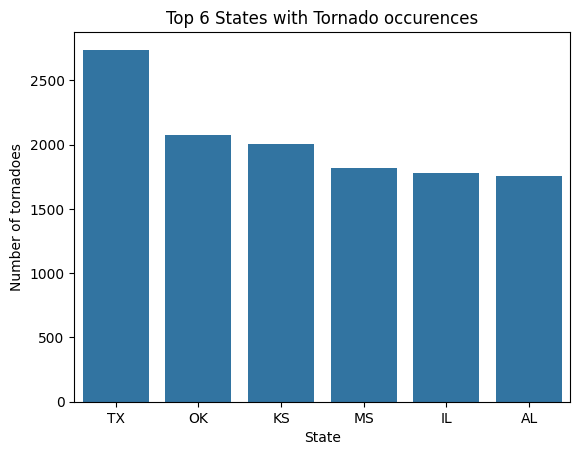

In [153]:
sns.barplot(state_group.head(6), x= 'State', y = 'Tornado_number')
plt.title("Top 6 States with Tornado occurences")
plt.xlabel('State')
plt.ylabel('Number of tornadoes')

plt.show()

### Plotting the trend for each state

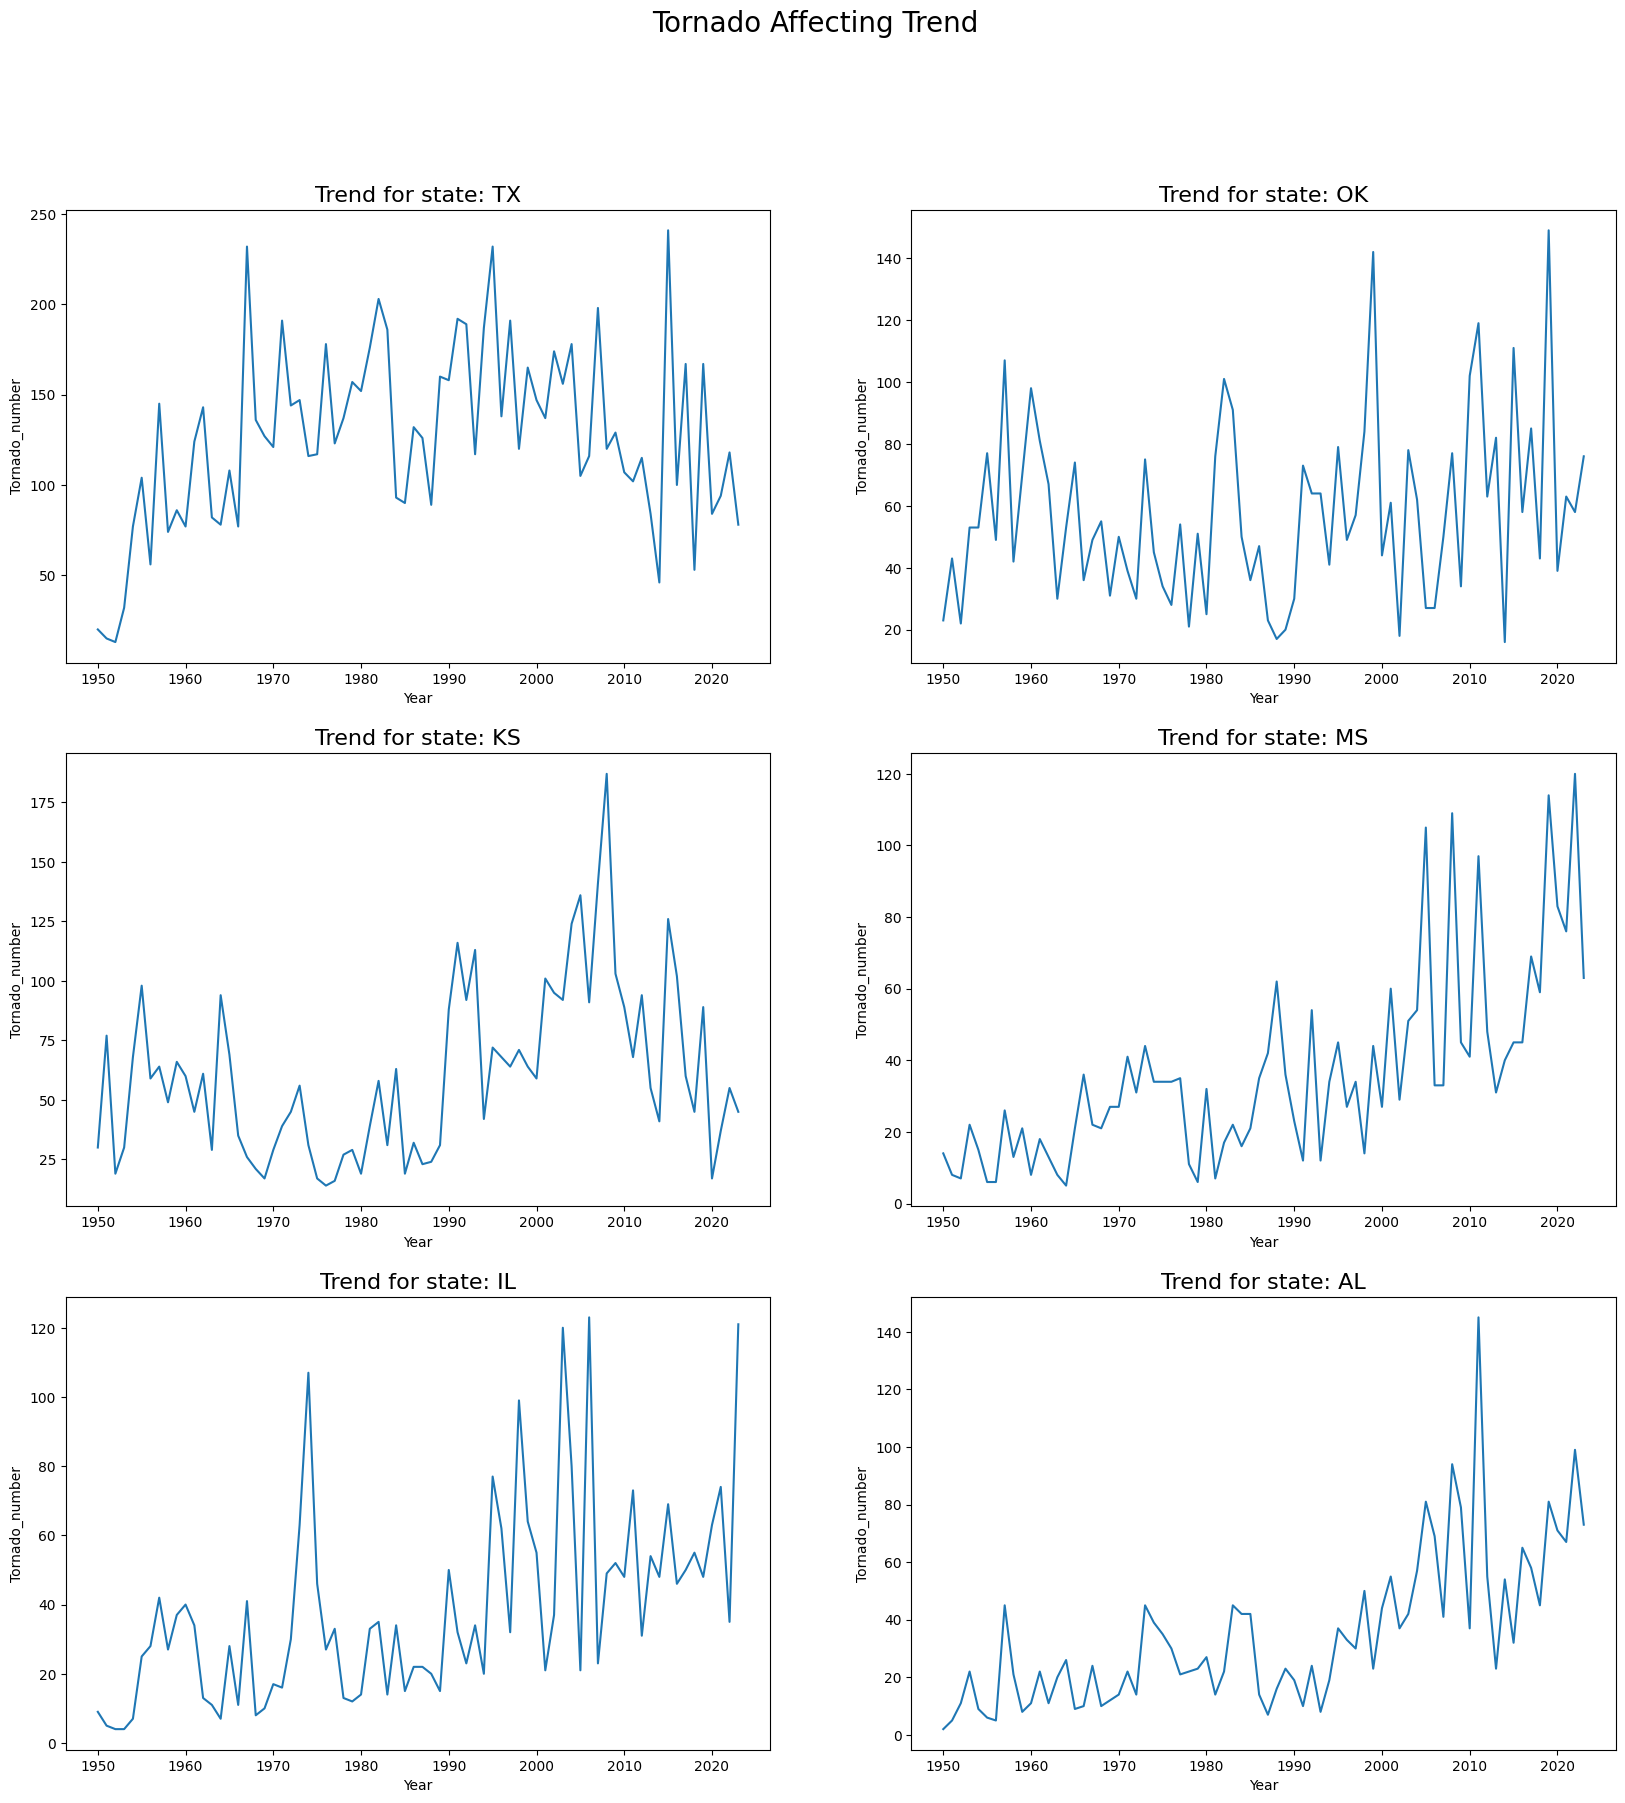

In [154]:
fig, axs = plt.subplots(3, 2, figsize=(20, 20))
fig.suptitle('Tornado Affecting Trend', fontsize=20)
plot_locations = [[0,0,0], [0,1,1], [1,0,2], [1,1,3], [2,0,4], [2,1,5]]

for i, j, k in plot_locations:
    sns.lineplot(ax=axs[i,j], data = state_trend[state_trend['State'] == top6_states[k]], x = 'Year', y = 'Tornado_number', errorbar = None)
    axs[i,j].set_title(f'Trend for state: {top6_states[k]}', fontsize=16)
    

### Trend for entire Country

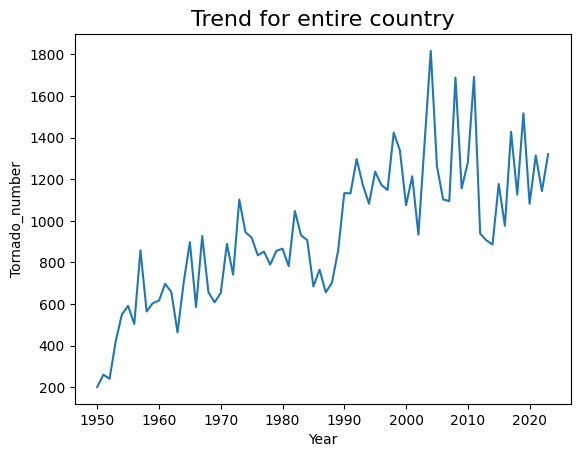

In [155]:
country_trend = df[['Year', 'Tornado_number']].groupby(['Year']).nunique('Tornado_number').reset_index()

sns.lineplot(data = country_trend, x = 'Year', y = 'Tornado_number', errorbar = None)
plt.title(f'Trend for entire country', fontsize=16)
plt.show()

## Function to create a new state column that contains full state name.

In [156]:
def add_state_name(dataframe):
    state_abbreviation_map = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts',
    'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana',
    'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico',
    'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
    'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming', 'PR': 'Puerto Rico', 
    'DC' : 'District of Columbia', 'VI': 'Virgin Islands'
}
    dataframe['State_new'] = dataframe['State'].apply(lambda x:state_abbreviation_map[x] )

    return dataframe

In [157]:
df = add_state_name(df)

## Tornado affecting trends

### Creating a dataframe to find the month trend 

In [158]:
month_trend = df\
    .groupby(['Year', 'Month', 'State_new'])\
    .nunique('Tornado_number') \
    .reset_index() \
    .loc[:, ['Year', 'Month', 'State_new', 'Tornado_number']]

month_trend['month_name'] = pd.to_datetime(month_trend['Month'], format='%m').dt.month_name()

month_trend.head()

,Year,Month,State_new,Tornado_number,month_name
0,1950,1,Arkansas,1,January
1,1950,1,Illinois,3,January
2,1950,1,Missouri,2,January
3,1950,1,Ohio,1,January
4,1950,1,Texas,1,January


### Plot to find the month trend

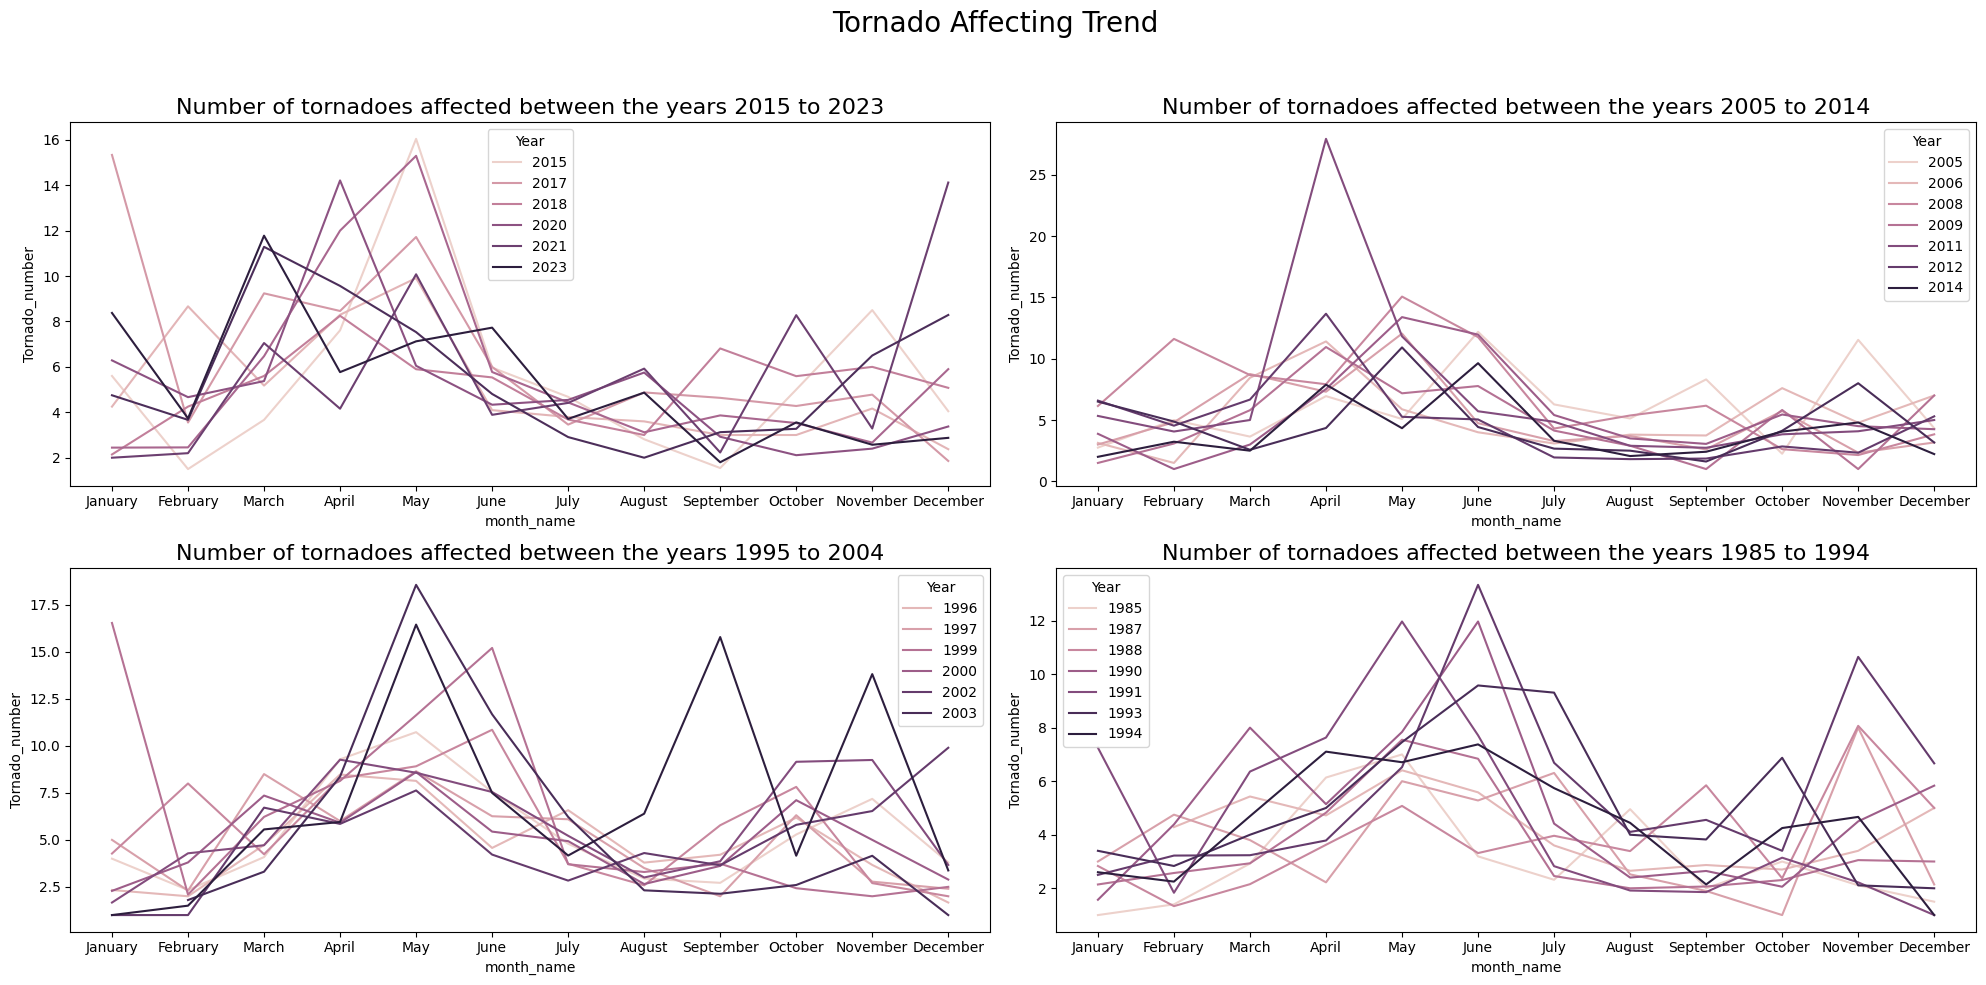

In [159]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle('Tornado Affecting Trend', fontsize=20)


sample_data = month_trend[month_trend['Year'] >= 2015]
sns.lineplot(ax=axs[0, 0], data = sample_data, x = 'month_name', y = 'Tornado_number', hue = 'Year', errorbar = None)
axs[0, 0].set_title('Number of tornadoes affected between the years 2015 to 2023', fontsize=16)


sample_data = month_trend[(month_trend['Year'] >= 2005) & (month_trend['Year'] < 2015)]
sns.lineplot(ax=axs[0, 1], data = sample_data, x = 'month_name', y = 'Tornado_number', hue = 'Year', errorbar = None)
axs[0, 1].set_title('Number of tornadoes affected between the years 2005 to 2014', fontsize=16)


sample_data = month_trend[(month_trend['Year'] >= 1995) & (month_trend['Year'] < 2005)]
sns.lineplot(ax=axs[1, 0], data = sample_data, x = 'month_name', y = 'Tornado_number', hue = 'Year', errorbar = None)
axs[1, 0].set_title('Number of tornadoes affected between the years 1995 to 2004', fontsize=16)


sample_data = month_trend[(month_trend['Year'] >= 1985) & (month_trend['Year'] < 1995)]
sns.lineplot(ax=axs[1, 1], data = sample_data, x = 'month_name', y = 'Tornado_number', hue = 'Year', errorbar = None)
axs[1, 1].set_title('Number of tornadoes affected between the years 1985 to 1994', fontsize=16)


plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the suptitle
plt.show()

## A Heat map of the US with some metrics for each State using Folium

### Finding Metrics

Here filtering only state number = 1 as per the data description.
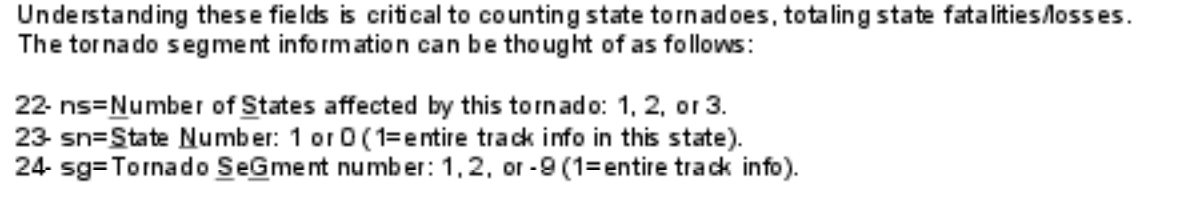

In [160]:
fatal_loss = df[df['State_number'] == 1]\
    [['Year','State_new', 'Tornado_number', 'Fatalities', 'Crop_loss', 'Property_loss', 'Injuries']]\
    .groupby(['Year', 'State_new'])\
    .aggregate({"Fatalities":"sum", "Tornado_number":'nunique', 'Crop_loss': 'sum', 'Property_loss': 'sum', 'Injuries': 'sum', }).reset_index()

In [161]:
fatal_loss.head()

,Year,State_new,Fatalities,Tornado_number,Crop_loss,Property_loss,Injuries
0,1950,Alabama,0,2,0.0,7.0,15
1,1950,Arkansas,2,12,0.0,40.0,49
2,1950,Colorado,0,2,0.0,4.0,1
3,1950,Connecticut,0,2,0.0,8.0,3
4,1950,Florida,0,6,0.0,21.0,0


### Creating a folium map

In [162]:
sample_year = 2023
df_year = fatal_loss[fatal_loss['Year'] == sample_year]

geojson_url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json'

m = folium.Map(location=[42, -98], zoom_start=4)

folium.Choropleth(
    geo_data=geojson_url,
    name='choropleth',
    data=df_year,
    columns=['State_new', 'Tornado_number'], 
    key_on='feature.properties.name',
    fill_color='Oranges',
    line_opacity=0.5,
    legend_name=f'Number of Tornadoes in the year {sample_year}'
).add_to(m)

def get_tooltip_content(state_name):
    row = df_year[df_year['State_new'] == state_name]
    if state_name in df_year['State_new'].values:
        content = f"""
        <b>State:</b> {state_name}<br>
        <b>Tornadoes:</b> {row['Tornado_number'].values[0]}<br>
        <b>Fatalities:</b> {row['Fatalities'].values[0]}<br>
        <b>Crop Loss:</b> ${row['Crop_loss'].values[0]:,.0f}<br>
        <b>Property Loss:</b> ${row['Property_loss'].values[0]:,.0f}<br>
        <b>Injuries:</b> {row['Injuries'].values[0]}
        """
    else:
        content = f"<b>State:</b> {state_name}<br>No data available"
    
    return content

tooltip_layer = folium.GeoJson(
    geojson_url,
    style_function=lambda x: {'fillColor': 'transparent', 'color': 'black', 'weight': 1, 'fillOpacity': 0},
    tooltip=folium.GeoJsonTooltip(
        fields=['name'],  # Field from GeoJSON to use for tooltips
        aliases=['State:'],  # Label for the field
        localize=True,
        sticky=False,
        labels=True
    ),
    highlight_function=lambda x: {'weight': 2, 'color': 'blue', 'fillOpacity': 0.7}
)

for feature in tooltip_layer.data['features']:
    state_name = feature['properties']['name']
    tooltip_content = get_tooltip_content(state_name)
    feature['properties']['tooltip'] = tooltip_content  # Add tooltip content for each state

tooltip_layer.add_child(folium.features.GeoJsonTooltip(fields=['tooltip'], labels=False))

tooltip_layer.add_to(m)

# displaying the map 
m

## Plotting the path of each Tornado

With the start and end latitudes and longitudes, I plotted a line which depicts the tornado’s path. To view a visual representation of size of each tornado, I used the Width of each tornado to change the line thickness. So, a thicker line means a bigger tornado. And I added a tool tip that shows the length and width of each tornado as we hover over the line.

In [163]:
tornado_location = df[['Tornado_number', 'Year', 'Start_lat','Start_lon', 'End_lat', 'End_lon', 'Length', 'Width']]
tornado_location = tornado_location[~ tornado_location.duplicated()]
tornado_location.head()

,Tornado_number,Year,Start_lat,Start_lon,End_lat,End_lon,Length,Width
0,192,1950,36.73,-102.52,36.88,-102.3,15.8,10
1,193,1950,34.17,-78.60,0.00,0.0,2.0,880
2,195,1950,37.37,-87.20,0.00,0.0,0.1,10
3,196,1950,38.20,-84.50,0.00,0.0,0.1,10
4,197,1950,32.42,-89.13,0.00,0.0,2.0,37


In [166]:
year = 1998
tornado_paths = tornado_location[tornado_location['Year'] == year]

tornado_map = folium.Map(location=[42, -98], zoom_start=4)

for _, row in tornado_paths.iterrows():
    weight_ = ((row['Width'] - min(tornado_paths['Width'])) / (max(tornado_paths['Width']) - min(tornado_paths['Width'])))*10
    start = [row['Start_lat'], row['Start_lon']]
    end = [row['End_lat'], row['End_lon']]
    weight = row['Width']
    hover_message = f"<b> Tornado Dimensions</b>  <br> Length: {row['Length']} miles <br>Width: {row['Width']} yards"
    
    folium.PolyLine(locations=[start, end], color="red", weight=weight_, tooltip=hover_message).add_to(tornado_map)

tornado_map